In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import metrics

import json
from datetime import datetime

# Table of contents

* [Dummy Regression](#Dummy Regression)
* [Linear Regression](#Linear Regression)
* [Decision Tree Regression](#Decision Tree Regression)

In [2]:
def resultize(grid):
    """make a fancy df from grid.cv_results"""
    
    res = grid.cv_results_
    res = pd.DataFrame(res)
    cols = [i for i in res.columns if 'split' not in i]
    res = res[cols]
    res = res.sort_values('rank_test_score')

    return res

In [3]:
data= pd.read_csv('cleaned_data.csv', sep=',')

In [4]:
#data = data.drop('NumberofFloors', axis=1)

In [5]:
data

,OSEBuildingID,NumberofBuildings,NumberofFloors,PropertyGFATotal,TotalGHGEmissions,Campus,NonResidential,Nonresidential COS,SPS-District K-12,Distribution Center,...,Large Office,Medical Office,Mixed Use Property,Other,Retail Store,Small- and Mid-Sized Office,Supermarket / Grocery Store,Warehouse,Worship Facility,Building_age
0,1,1.0,12,88434,249.98,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,89
1,2,1.0,11,103566,295.86,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,20
2,5,1.0,10,61320,286.43,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,90
3,8,1.0,18,175580,505.01,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,36
4,9,1.0,2,97288,301.81,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,50069,1.0,2,24990,134.80,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,87
1479,50070,1.0,1,72000,67.65,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,3
1480,50081,1.0,3,45000,9.24,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1481,50196,1.0,1,20616,4.44,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,11


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   OSEBuildingID                1483 non-null   int64  
 1   NumberofBuildings            1483 non-null   float64
 2   NumberofFloors               1483 non-null   int64  
 3   PropertyGFATotal             1483 non-null   int64  
 4   TotalGHGEmissions            1483 non-null   float64
 5   Campus                       1483 non-null   int64  
 6   NonResidential               1483 non-null   int64  
 7   Nonresidential COS           1483 non-null   int64  
 8   SPS-District K-12            1483 non-null   int64  
 9   Distribution Center          1483 non-null   int64  
 10  Hotel                        1483 non-null   int64  
 11  K-12 School                  1483 non-null   int64  
 12  Large Office                 1483 non-null   int64  
 13  Medical Office    

In [70]:
corrMatrix = data.corr(method='spearman')

In [71]:
corrMatrix.style.applymap(lambda x: 'background-color : lightgreen' if (x >= 0.7) & (x < 0.9)
                          else 'background-color : green' if (x >= 0.9) & (x != 1)
                          else '')

,OSEBuildingID,NumberofBuildings,NumberofFloors,PropertyGFATotal,TotalGHGEmissions,Campus,NonResidential,Nonresidential COS,Distribution Center,Hotel,K-12 School,Large Office,Medical Office,Mixed Use Property,Other,Retail Store,Small- and Mid-Sized Office,Supermarket / Grocery Store,Warehouse,Worship Facility,Building_age
OSEBuildingID,1.000000,-0.014059,-0.296875,-0.543304,-0.290287,0.016483,0.059749,0.029406,-0.022858,-0.178664,-0.048771,-0.223816,-0.021717,0.052247,0.049232,-0.003105,0.049996,0.071737,0.062252,0.092811,0.030126
NumberofBuildings,-0.014059,1.000000,-0.033678,0.030519,0.050080,0.269165,-0.066712,-0.037474,0.033810,0.016135,0.034187,-0.004726,-0.016452,-0.007228,0.069924,-0.033763,-0.057972,-0.032879,-0.012799,-0.010935,-0.042367
NumberofFloors,-0.296875,-0.033678,1.000000,0.451708,0.186662,-0.024412,0.163276,-0.114512,-0.186702,0.270779,-0.090915,0.420947,0.064275,0.008528,-0.111495,-0.132239,0.172905,-0.157698,-0.294888,-0.082932,-0.051499
PropertyGFATotal,-0.543304,0.030519,0.451708,1.000000,0.495193,0.043317,-0.061816,-0.055134,-0.021356,0.126602,0.043590,0.457077,0.052257,-0.047489,-0.074795,-0.033102,-0.158687,-0.029697,-0.067368,-0.181646,-0.272107
TotalGHGEmissions,-0.290287,0.050080,0.186662,0.495193,1.000000,0.105995,-0.121955,0.083222,-0.088231,0.209670,0.059943,0.222808,0.030273,-0.008040,0.107208,-0.020531,-0.264283,0.179810,-0.196261,-0.083295,-0.120802
Campus,0.016483,0.269165,-0.024412,0.043317,0.105995,1.000000,-0.290650,-0.023607,-0.019906,-0.023424,0.054440,-0.014122,-0.016985,0.046824,0.062953,-0.025884,-0.051723,-0.017697,-0.038231,-0.022682,-0.004084
NonResidential,0.059749,-0.066712,0.163276,-0.061816,-0.121955,-0.290650,1.000000,-0.591682,0.045328,0.080592,-0.576318,0.094092,0.044990,0.033595,-0.162853,0.089055,0.156744,0.060889,0.085583,0.078039,0.088335
Nonresidential COS,0.029406,-0.037474,-0.114512,-0.055134,0.083222,-0.023607,-0.591682,1.000000,-0.004451,-0.047685,-0.069091,-0.039603,-0.013630,0.005331,0.328826,-0.052692,-0.072253,-0.036027,-0.006254,-0.046175,-0.039662
Distribution Center,-0.022858,0.033810,-0.186702,-0.021356,-0.088231,-0.019906,0.045328,-0.004451,1.000000,-0.040210,-0.058260,-0.060853,-0.029157,-0.049706,-0.076531,-0.044432,-0.088788,-0.030379,-0.065627,-0.038936,0.014171
Hotel,-0.178664,0.016135,0.270779,0.126602,0.209670,-0.023424,0.080592,-0.047685,-0.040210,1.000000,-0.068557,-0.071608,-0.034310,-0.058492,-0.090057,-0.052285,-0.104480,-0.035748,-0.077227,-0.045818,-0.034838


In [9]:
data

,OSEBuildingID,NumberofBuildings,NumberofFloors,PropertyGFATotal,TotalGHGEmissions,Campus,NonResidential,Nonresidential COS,SPS-District K-12,Distribution Center,...,Large Office,Medical Office,Mixed Use Property,Other,Retail Store,Small- and Mid-Sized Office,Supermarket / Grocery Store,Warehouse,Worship Facility,Building_age
0,1,1.0,12,88434,249.98,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,89
1,2,1.0,11,103566,295.86,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,20
2,5,1.0,10,61320,286.43,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,90
3,8,1.0,18,175580,505.01,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,36
4,9,1.0,2,97288,301.81,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,50069,1.0,2,24990,134.80,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,87
1479,50070,1.0,1,72000,67.65,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,3
1480,50081,1.0,3,45000,9.24,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1481,50196,1.0,1,20616,4.44,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,11


In [10]:
'''data2 = data[['NumberofBuildings',
              'NumberofFloors',
              'PropertyGFATotal',
              'Building_age',
              'TotalGHGEmissions']]'''

"data2 = data[['NumberofBuildings',\n              'NumberofFloors',\n              'PropertyGFATotal',\n              'Building_age',\n              'TotalGHGEmissions']]"

In [11]:
#pd.plotting.scatter_matrix(data2, diagonal='kde')

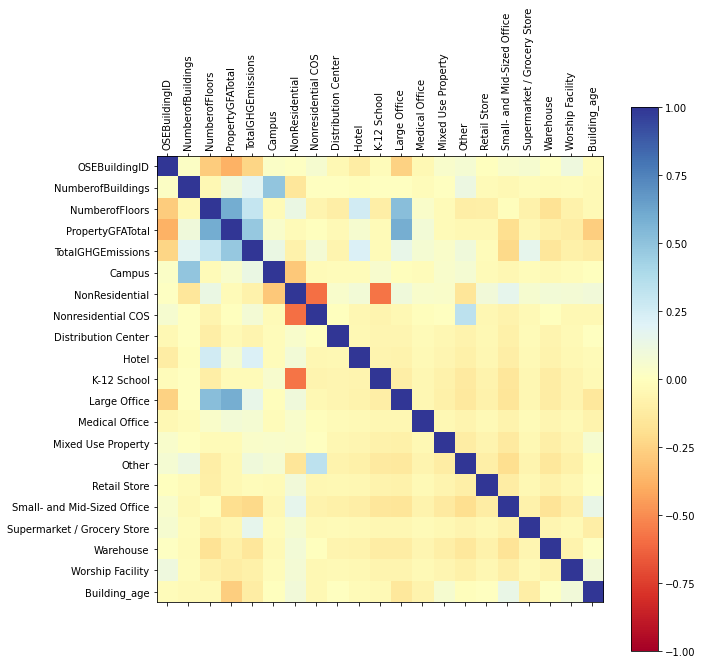

In [68]:
def correlationMatrix(df):
    '''Show a correlation matrix for all features.'''
    columns = df.select_dtypes(include=['float64','int64']).columns
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none',cmap='RdYlBu')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(columns)))
    ax.set_yticks(np.arange(len(columns)))
    ax.set_xticklabels(columns, rotation = 90)
    ax.set_yticklabels(columns)
    plt.show() 
    
correlationMatrix(data)

In [13]:
data = data.drop('SPS-District K-12', axis=1)

In [14]:
features = data.columns.to_list()
features.remove('TotalGHGEmissions')

In [15]:
features

['OSEBuildingID',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'Campus',
 'NonResidential',
 'Nonresidential COS',
 'Distribution Center',
 'Hotel',
 'K-12 School',
 'Large Office',
 'Medical Office',
 'Mixed Use Property',
 'Other',
 'Retail Store',
 'Small- and Mid-Sized Office',
 'Supermarket / Grocery Store',
 'Warehouse',
 'Worship Facility',
 'Building_age']

In [16]:
X = data[features]
y = data['TotalGHGEmissions']

In [17]:
'''sns.pairplot(data,
             x_vars=['PropertyGFATotal',
                     'NumberofBuildings'
                     'NumberofFloors'],
             y_vars='TotalGHGEmissions',
             kind='reg')'''

"sns.pairplot(data,\n             x_vars=['PropertyGFATotal',\n                     'NumberofBuildings'\n                     'NumberofFloors'],\n             y_vars='TotalGHGEmissions',\n             kind='reg')"

# PCA

In [18]:
#pca = PCA(n_components=4)
#pca.fit(X)

In [19]:
#X = pca.transform(X)

In [20]:
#print(pca.explained_variance_ratio_)
#print(pca.singular_values_)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('X_train shape:', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape :', y_test.shape)

X_train shape: (1038, 20)
X_test shape:  (445, 20)
y_train shape: (1038,)
y_test shape : (445,)


In [22]:
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

In [23]:
#normalizer = preprocessing.Normalizer().fit(X_train)
#X_train = normalizer.transform(X_train)
#X_test = normalizer.transform(X_test)

In [24]:
X_train

array([[-1.14036799, -0.05526383,  0.08860673, ..., -0.35984521,
        -0.21287842,  0.94308551],
       [ 0.28792729, -0.05526383, -0.39546583, ..., -0.35984521,
        -0.21287842,  0.91300738],
       [ 0.61044558, -0.05526383, -0.39546583, ..., -0.35984521,
        -0.21287842, -1.19246159],
       ...,
       [ 0.44346482, -0.05526383,  0.33064301, ..., -0.35984521,
        -0.21287842, -0.22996149],
       [ 2.56452699, -0.05526383,  0.08860673, ..., -0.35984521,
        -0.21287842, -0.26003962],
       [ 0.65689605, -0.05526383, -0.6375021 , ...,  2.77897267,
        -0.21287842,  0.58214797]])

# Dummy Regression

In [25]:
dummy_regressor = DummyRegressor(strategy='mean')
dummy_regressor.fit(X_train, y_train)

DummyRegressor()

In [26]:
y_pred = dummy_regressor.predict(X_test)
y_pred[:10]

array([102.35322736, 102.35322736, 102.35322736, 102.35322736,
       102.35322736, 102.35322736, 102.35322736, 102.35322736,
       102.35322736, 102.35322736])

In [27]:
print('R2 train score:', dummy_regressor.score(X_train, y_train).round(4))
print('R2 test score :' , dummy_regressor.score(X_test, y_test).round(4))
print()
print('MAE  test (Mean Absolute Error):    ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE  test (Mean Squared Error):     ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE test (Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 train score: 0.0
R2 test score : -0.0

MAE  test (Mean Absolute Error):     89.30121627589789
MSE  test (Mean Squared Error):      16365.972427767289
RMSE test (Root Mean Squared Error): 127.92956041418765


# Linear Regression

In [28]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [29]:
print(lin_reg.intercept_)
print(lin_reg.coef_)

102.35322736030828
[-14.38919698  12.09677341  11.03965298  63.01021205  10.14776117
  10.26942056  13.16098063 -12.35022402  15.72278061  -3.82787398
 -31.5009436   -0.98861694  -1.69882192  -1.13236957  -7.9723975
 -25.31815988  19.89060287 -20.1022754   -9.28091037   2.28718648]


In [30]:
y_pred_train = lin_reg.predict(X_train)
print(y_pred_train[:10])

y_pred = lin_reg.predict(X_test)
print(y_pred[:10])

[111.45899508  55.44947045  56.94587757  52.58903798 175.86779434
  93.71752208  30.19165084  68.9632382  102.65388963  78.43921938]
[124.39303618 110.73270341  80.92387851 133.42662649  -8.83988663
 178.77964175 168.04332837 267.10864274 233.78646831  61.07865288]


In [31]:
print('R2 train score:', lin_reg.score(X_train, y_train).round(4))
print('R2 test score :' , lin_reg.score(X_test, y_test).round(4))
print()
print('MAE  train (Mean Absolute Error)    :', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE  train (Mean Squared Error)     :', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE train (Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print()
print('MAE  test (Mean Absolute Error)    :', metrics.mean_absolute_error(y_test, y_pred))
print('MSE  test (Mean Squared Error)     :', metrics.mean_squared_error(y_test, y_pred))
print('RMSE test (Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 train score: 0.4013
R2 test score : 0.3357

MAE  train (Mean Absolute Error)    : 65.80865778187528
MSE  train (Mean Squared Error)     : 10639.58451178433
RMSE train (Root Mean Squared Error): 103.14836165341808

MAE  test (Mean Absolute Error)    : 67.36128760107634
MSE  test (Mean Squared Error)     : 10871.323213115778
RMSE test (Root Mean Squared Error): 104.26563773897793


## GridSearchCV

In [32]:
estimator = LinearRegression()

params = {
         }

In [33]:
grid = GridSearchCV(estimator,
                    params,
                    cv=5,
                    n_jobs=-1,
                    return_train_score=True,
                    verbose=3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1, param_grid={},
             return_train_score=True, verbose=3)

In [34]:
best_params = grid.best_params_
best_params

{}

In [35]:
resultize(grid)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
0,0.040162,0.015682,0.001399,0.00049,{},0.351034,0.048579,1,0.405995,0.01417


# Decision Tree Regression

In [36]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [37]:
y_pred_train = tree_reg.predict(X_train)
print(y_pred_train[:10])

y_pred = tree_reg.predict(X_test)
print(y_pred[:10])

[109.85  83.59  28.57  29.41 147.82   3.    17.87   6.32 237.36 185.23]
[ 44.32 177.62  85.15 111.23 119.76  30.49 406.02 214.19  34.14   4.19]


In [38]:
print('R2 train score:', tree_reg.score(X_train, y_train).round(4))
print('R2 test score :' , tree_reg.score(X_test, y_test).round(4))
print()
print('MAE  train (Mean Absolute Error)    :', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE  train (Mean Squared Error)     :', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE train (Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print()
print('MAE  test (Mean Absolute Error)    :', metrics.mean_absolute_error(y_test, y_pred))
print('MSE  test (Mean Squared Error)     :', metrics.mean_squared_error(y_test, y_pred))
print('RMSE test (Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 train score: 1.0
R2 test score : -0.6589

MAE  train (Mean Absolute Error)    : 0.0
MSE  train (Mean Squared Error)     : 0.0
RMSE train (Root Mean Squared Error): 0.0

MAE  test (Mean Absolute Error)    : 98.6160224719101
MSE  test (Mean Squared Error)     : 27149.41298719101
RMSE test (Root Mean Squared Error): 164.77078924127


## GridSearchCV

In [39]:
estimator = DecisionTreeRegressor()

params = {'max_depth': [1, 2, 3, 5, 10]
         }

In [40]:
grid = GridSearchCV(estimator,
                    params,
                    cv=5,
                    n_jobs=-1,
                    return_train_score=True,
                    verbose=3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 10]},
             return_train_score=True, verbose=3)

In [41]:
best_params = grid.best_params_
best_params

{'max_depth': 2}

In [42]:
resultize(grid)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
1,0.005395,0.005346,0.001598,0.000801,2,{'max_depth': 2},0.291953,0.067061,1,0.313210,0.012718
2,0.006392,0.004313,0.005395,0.006242,3,{'max_depth': 3},0.277012,0.050987,2,0.389479,0.013614
0,0.001598,0.000799,0.001199,0.000399,1,{'max_depth': 1},0.209945,0.047294,3,0.230367,0.011721
3,0.010189,0.007404,0.001598,0.000489,5,{'max_depth': 5},0.209651,0.115757,4,0.559406,0.037577
4,0.011987,0.006535,0.001598,0.000799,10,{'max_depth': 10},-0.067416,0.167724,5,0.873152,0.010133


# Random Forest Regressor

In [43]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [44]:
y_pred_train = random_forest.predict(X_train)
print(y_pred_train[:10])

y_pred = random_forest.predict(X_test)
print(y_pred[:10])

[ 95.6958  83.6554  31.2545  50.4378 173.2563  42.1124  28.6813  11.8652
 197.5547 144.6394]
[ 82.2695 103.604   70.3013 157.744   70.313   60.823  209.1076 201.0434
 174.9744 156.3623]


In [45]:
print('R2 train score:', random_forest.score(X_train, y_train).round(4))
print('R2 test score :' , random_forest.score(X_test, y_test).round(4))
print()
print('MAE  train (Mean Absolute Error)    :', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE  train (Mean Squared Error)     :', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE train (Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print()
print('MAE  test (Mean Absolute Error)    :', metrics.mean_absolute_error(y_test, y_pred))
print('MSE  test (Mean Squared Error)     :', metrics.mean_squared_error(y_test, y_pred))
print('RMSE test (Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 train score: 0.9172
R2 test score : 0.3201

MAE  train (Mean Absolute Error)    : 23.793306840077072
MSE  train (Mean Squared Error)     : 1471.2723421050193
RMSE train (Root Mean Squared Error): 38.35716806680362

MAE  test (Mean Absolute Error)    : 69.03945640449439
MSE  test (Mean Squared Error)     : 11126.462634549327
RMSE test (Root Mean Squared Error): 105.48204887348997


## GridSearchCV

In [46]:
estimator = RandomForestRegressor()

params = {'n_estimators': [100, 200, 300],
          'max_depth': [1, 3, 5, 10]
          #'min_samples_split': [''],
          #'max_leaf_nodes': ['']
         }

In [47]:
grid = GridSearchCV(estimator,
                    params,
                    cv=5,
                    n_jobs=-1,
                    return_train_score=True,
                    verbose=3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 10],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=3)

In [48]:
best_params = grid.best_params_
best_params

{'max_depth': 10, 'n_estimators': 100}

In [49]:
resultize(grid)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
9,0.913994,0.110605,0.026573,0.003437,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.400260,0.094566,1,0.844974,0.006565
10,1.742916,0.254974,0.063144,0.011695,10,200,"{'max_depth': 10, 'n_estimators': 200}",0.397647,0.090182,2,0.843703,0.006348
11,2.049359,0.198550,0.057942,0.006769,10,300,"{'max_depth': 10, 'n_estimators': 300}",0.394819,0.094856,3,0.844408,0.008162
6,0.677331,0.029990,0.026100,0.004500,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.389460,0.065646,4,0.602166,0.018576
7,1.430529,0.144216,0.054546,0.019865,5,200,"{'max_depth': 5, 'n_estimators': 200}",0.389078,0.075066,5,0.602107,0.019341
8,1.912930,0.254347,0.084448,0.020064,5,300,"{'max_depth': 5, 'n_estimators': 300}",0.387753,0.072024,6,0.603591,0.017131
3,0.661841,0.075746,0.030972,0.012404,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.347869,0.067234,7,0.447396,0.020169
4,1.069328,0.073205,0.063756,0.011971,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.346016,0.068484,8,0.449849,0.019043
5,1.718664,0.083980,0.068532,0.010536,3,300,"{'max_depth': 3, 'n_estimators': 300}",0.345133,0.068979,9,0.450239,0.018245
1,0.870031,0.070481,0.057470,0.010930,1,200,"{'max_depth': 1, 'n_estimators': 200}",0.233362,0.061625,10,0.254492,0.013473


### Test with best params

In [50]:
random_forest = RandomForestRegressor(max_depth=10,
                                      n_estimators=200,
                                      min_samples_split=3,
                                      max_leaf_nodes=100)
random_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_leaf_nodes=100, min_samples_split=3,
                      n_estimators=200)

In [51]:
y_pred_train = random_forest.predict(X_train)
print(y_pred_train[:10])

y_pred = random_forest.predict(X_test)
print(y_pred[:10])

[ 72.62101762  71.63965262  43.23324497  73.89802389 175.62050067
  68.74194467  42.23104901  42.07107544 164.53538956  81.29773943]
[ 86.02480736  99.4691245   53.17574992 163.97378215  43.72011612
  65.2856708  189.66238662 189.63293152 179.00424788 131.53386104]


In [52]:
print('R2 train score:', random_forest.score(X_train, y_train).round(4))
print('R2 test score :' , random_forest.score(X_test, y_test).round(4))
print()
print('MAE  train (Mean Absolute Error)    :', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE  train (Mean Squared Error)     :', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE train (Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print()
print('MAE  test (Mean Absolute Error)    :', metrics.mean_absolute_error(y_test, y_pred))
print('MSE  test (Mean Squared Error)     :', metrics.mean_squared_error(y_test, y_pred))
print('RMSE test (Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 train score: 0.818
R2 test score : 0.3584

MAE  train (Mean Absolute Error)    : 38.67583917813526
MSE  train (Mean Squared Error)     : 3234.2507161629183
RMSE train (Root Mean Squared Error): 56.87047314875196

MAE  test (Mean Absolute Error)    : 65.6337257550319
MSE  test (Mean Squared Error)     : 10501.17072618867
RMSE test (Root Mean Squared Error): 102.47522005923514


# Gradient Boosting Regression

In [53]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [54]:
y_pred = gbr.predict(X_test)

In [55]:
gbr.score(X_train, y_train)

0.6945772886439833

In [56]:
gbr.score(X_test, y_test)

0.34719737894014935

In [57]:
gbr.get_params

<bound method BaseEstimator.get_params of GradientBoostingRegressor(random_state=42)>

## GridSearch

In [63]:
estimator = GradientBoostingRegressor()

params = {'n_estimators': [50, 60, 100, 150, 200],
          'max_depth': [3, 4, 5],
          'learning_rate': [0.1, 0.03, 0.01]
         }

In [64]:
grid = GridSearchCV(estimator,
                    params,
                    cv=5,
                    n_jobs=-1,
                    return_train_score=True,
                    verbose=3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.03, 0.01],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 60, 100, 150, 200]},
             return_train_score=True, verbose=3)

In [65]:
best_params = grid.best_params_
best_params

{'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 200}

In [66]:
resultize(grid)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
19,0.755929,0.092862,0.002499,0.000446,0.03,3,200,"{'learning_rate': 0.03, 'max_depth': 3, 'n_est...",0.433527,0.077512,1,0.657301,0.024339
1,0.205391,0.023767,0.001598,0.000490,0.1,3,60,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.425351,0.082315,2,0.662712,0.023113
24,0.689929,0.023738,0.002197,0.000400,0.03,4,200,"{'learning_rate': 0.03, 'max_depth': 4, 'n_est...",0.425315,0.069550,3,0.758240,0.021780
18,0.658815,0.060771,0.003898,0.003324,0.03,3,150,"{'learning_rate': 0.03, 'max_depth': 3, 'n_est...",0.425307,0.077297,4,0.622732,0.025815
23,0.560292,0.021069,0.004195,0.004441,0.03,4,150,"{'learning_rate': 0.03, 'max_depth': 4, 'n_est...",0.424845,0.064550,5,0.723146,0.025355
0,0.145649,0.016088,0.001199,0.000399,0.1,3,50,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.421305,0.079803,6,0.640602,0.022892
5,0.217621,0.058695,0.001199,0.000400,0.1,4,50,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.419275,0.071589,7,0.741727,0.021854
6,0.277552,0.059481,0.001997,0.000630,0.1,4,60,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.417430,0.077352,8,0.763639,0.020469
22,0.399013,0.046711,0.002997,0.002528,0.03,4,100,"{'learning_rate': 0.03, 'max_depth': 4, 'n_est...",0.416033,0.061911,9,0.670415,0.023466
2,0.317692,0.034651,0.001596,0.000488,0.1,3,100,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.408852,0.076288,10,0.727889,0.022061


## Export for data history

In [67]:
params = str(best_params)
score = round(grid.best_score_, 4)
duration = round(grid.refit_time_, 4)
variables = data.columns.to_list()

time = datetime.now()
dt_string = time.strftime("%d-%m-%Y %H-%M-%S")

print(params)
print(score)
print(duration)
print(dt_string)

dictionary = {'params': params,
              'score': score,
              'duration:': duration,
              'date:': dt_string,
              'variables': variables}

f = open(str(score).replace('.', ',') + '   ' + dt_string + '.txt', 'w')
f.write(str(dictionary))
f.close()

{'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 200}
0.4335
0.341
08-11-2022 03-04-23
